### Laboratorium 6 - zadania

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 1 (1.5 pkt | 1.0 pkt)

Dany jest obraz `road`. Wykorzystaj transformatę Hougha do detekcji linii, aby wykryć pas jezdni. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj wyniki pośrednie przed użyciem transformaty Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem `threshold` i przeanalizuj ich wpływ na osiągane wyniki.  
Nie skupiaj się na parametrach detektora krawędzi - znajdź odpowiednie i tych się trzymaj.  
Ostateczny rezultat zaprezentuj w postaci linii naniesionych na kopię obrazu wejściowego.

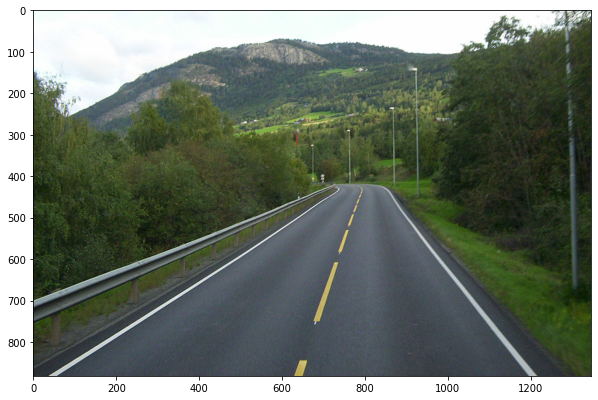

In [43]:
road = cv2.imread('Road_in_Norway.jpg')
plt.imshow(cv2.cvtColor(road, cv2.COLOR_BGR2RGB));
plt.gcf().set_figwidth(10)
plt.gcf().set_figheight(10)

In [25]:
def rhotheta2xy(line):
    # to samo co w przykładzie tylko w formie funkcji - na potrzeby rysowania
    # zwraca współrzędne odcinka leżącego na pojedynczej linii
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))
    return x1, y1, x2, y2

Rozwiązanie:

#### Zadanie 2 (1.5 pkt | 1.0 pkt)

Dany jest obraz `coins`. Celem jest (1) przebadanie wpływu parametrów funkcji [`cv2.HoughCircles`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d) na znajdowane okręgi oraz (2) wykorzystanie transformaty Hougha do zliczenia monet znajdujących się na obrazie. Jak poprzednio, zacznij od uzyskania dobrej jakości detekcji krawędzi - natychmiast zauważysz, że im więcej na obrazie zakłóceń (tj. krawędzi nie będących interesującymi nas okręgami), tym gorsze będą rezultaty transformacji Hougha.  
Aby wyznaczyć sensowne wartości początkowe parametrów `HoughCircles`, przyjrzyj się geometrii obrazu - "na oko" przyjmij wartości `minDist`, `minRadius` i `maxRadius`; wybierz metodę `cv2.HOUGH_GRADIENT`, załóż $dp=1.5$ i przy tych wartościach znajdź wartość `param2`. Jeśli twój detektor krawędzi działa dobrze, parametr `param1` możesz wtedy pominąć.

Zwróć uwagę, że `cv2.HoughCircles` zwraca wynik w postaci zmiennoprzecinkowej `np.ndarray` o 3 wymiarach: (1, N, 3) gdzie N to liczba wykrytych okręgów a trójka liczb w ostatnim wymiarze odpowiada parametrom *x, y, r* wykrytego okręgu.

Zaprezentuj ostateczny wynik tak jak w zadaniu 1; do narysowania okręgów wykorzystaj funkcję [`cv2.circle`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670) (pamiętaj, że oczekuje parametrów okręgu jako liczby całkowite!).

---

*Jeśli starczy czasu*: wykorzystując wykryte okręgi do dalszego przetwarzania obrazu, odróżnij monety srebrne od brązowych (policz jedne i drugie, zaznacz okręgami o różnych kolorach na obrazie).

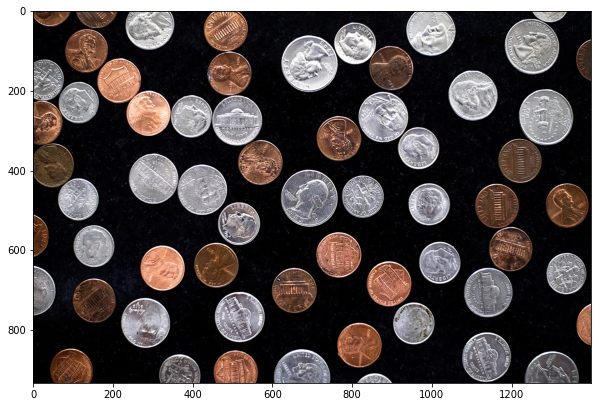

In [36]:
coins = cv2.imread('Coins.jpg')
plt.imshow(coins[..., ::-1]);
plt.gcf().set_figwidth(10)
plt.gcf().set_figheight(10)

Rozwiązanie: